In [1]:
#!/usr/bin/python
import warnings
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

warnings.simplefilter('ignore', FutureWarning)

/opt/conda/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# fetch multiple asset data
def getMultiAssetData(ticketList, date_from, date_to):
    def getData(ticker):
        data = pdr.DataReader(ticker, 'yahoo', date_from, date_to)
        return data
    datas = map(getData, tickerList)
    return pd.concat(datas, keys=tickerList, names=['Ticker', 'Date'])

# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
Y|AAPL|Apple Inc. - Common Stock|Q|Q|N|100|N|N||AAPL|N  
Y|AMZN|Amazon.com, Inc. - Common Stock|Q|Q|N|100|N|N||AMZN|N  
Y|CCEP|Coca-Cola European Partners plc Ordinary Shares|N| |N|100|N||CCEP|CCEP|N  
Y|FB|Facebook, Inc. - Class A Common Stock|Q|Q|N|100|N|N||FB|N  
Y|JNJ|Johnson & Johnson Common Stock|N| |N|100|N||JNJ|JNJ|N  
Y|JWN|Nordstrom, Inc. Common Stock|N| |N|100|N||JWN|JWN|N  
Y|NVS|Novartis AG Common Stock|N| |N|100|N||NVS|NVS|N  
Y|PG|Procter & Gamble Company (The) Common Stock|N| |N|100|N||PG|PG|N  

In [3]:
date_from = datetime.date(2018, 1, 1)
date_to = datetime.date(2020, 8, 31)
tickerList = ['AAPL', 'AMZN', 'CCEP', 'FB', 'JNJ', 'JWN', 'NVS', 'PG']
multiData = getMultiAssetData(tickerList, date_from, date_to)
df = multiData.copy()

In [4]:
df.loc['AAPL', :]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.513580
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.506344
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.699139
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,42.173893
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,42.017254
...,...,...,...,...,...,...
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,124.824997
2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,126.522499
2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0,125.010002


In [5]:
aapl = df.loc['AAPL', :]
aapl['Return'] = aapl['Close'].pct_change().fillna(method='bfill')
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close,Return
Date,,,,,,,
2020-08-25,125.180000,123.052498,124.697502,124.824997,211495600.0,124.824997,-0.008204
2020-08-26,126.992500,125.082497,126.180000,126.522499,163022400.0,126.522499,0.013599
2020-08-27,127.485001,123.832497,127.142502,125.010002,155552400.0,125.010002,-0.011954
2020-08-28,126.442497,124.577499,126.012497,124.807503,187630000.0,124.807503,-0.001620
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,129.039993,0.033912


In [6]:
print(aapl.isnull().all())
aapl['Return'].describe() # stats information for Apple Inc. Return

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
Return       False
dtype: bool


count    671.000000
mean       0.001871
std        0.021677
min       -0.128647
25%       -0.007543
50%        0.001810
75%        0.011846
max        0.119808
Name: Return, dtype: float64

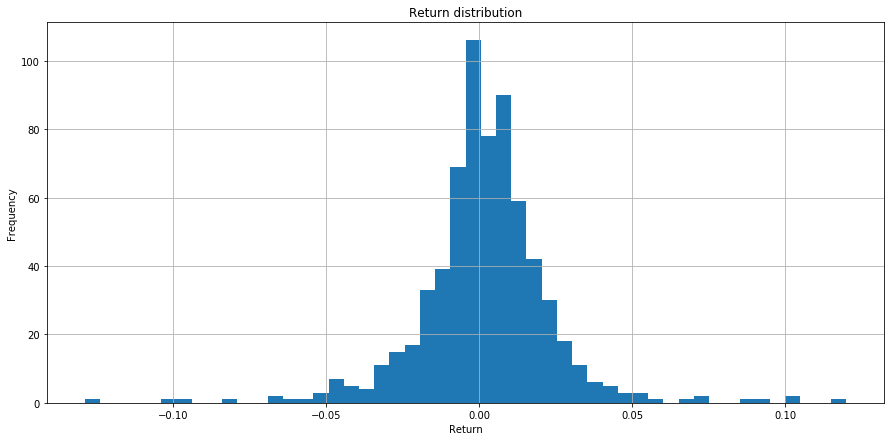

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
aapl['Return'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Frequency')
ax1.set_title('Return distribution')
plt.show()

In [8]:
# use pivot to reshape DataFrame with only Close
df = multiData.copy()
closePrice = df[['Close']]
closePrice = closePrice.reset_index()
closePriceTable = closePrice.pivot(index='Date', columns='Ticker', values='Close')
closePriceTable.tail()

Ticker,AAPL,AMZN,CCEP,FB,JNJ,JWN,NVS,PG
Date,,,,,,,,
2020-08-25,124.824997,3346.489990,41.750000,280.820007,152.059998,15.54,86.449997,139.059998
2020-08-26,126.522499,3441.850098,41.500000,303.910004,152.300003,14.69,87.029999,138.389999
2020-08-27,125.010002,3400.000000,41.500000,293.220001,152.979996,14.79,87.000000,138.210007
2020-08-28,124.807503,3401.800049,41.919998,293.660004,153.639999,15.68,86.599998,138.770004
2020-08-31,129.039993,3450.959961,41.160000,293.200012,153.410004,16.00,86.059998,138.330002


In [9]:
returns_portfolio = closePriceTable.pct_change().fillna(method='bfill')
returns_portfolio.tail()

Ticker,AAPL,AMZN,CCEP,FB,JNJ,JWN,NVS,PG
Date,,,,,,,,
2020-08-25,-0.008204,0.011801,0.017300,0.034747,-0.000591,-0.001927,0.000810,0.003971
2020-08-26,0.013599,0.028496,-0.005988,0.082223,0.001578,-0.054698,0.006709,-0.004818
2020-08-27,-0.011954,-0.012159,0.000000,-0.035175,0.004465,0.006807,-0.000345,-0.001301
2020-08-28,-0.001620,0.000529,0.010120,0.001501,0.004314,0.060176,-0.004598,0.004052
2020-08-31,0.033912,0.014451,-0.018130,-0.001566,-0.001497,0.020408,-0.006236,-0.003171


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


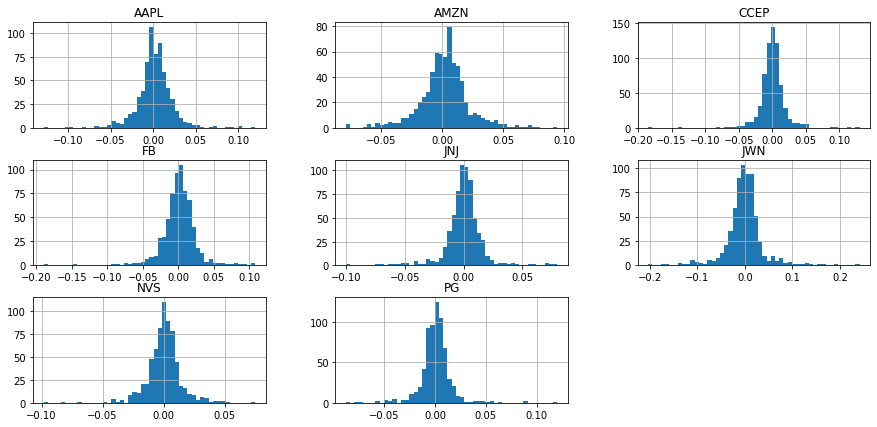

In [10]:
%matplotlib inline
fig2 = plt.figure(figsize=(15, 7))
ax2 = fig2.add_subplot(1, 1, 1)
returns_portfolio.hist(bins=50, ax=ax2)
ax2.set_xlabel('Return')
ax2.set_ylabel('Frequency')
ax2.set_title('Portfolio Return Distribution')
plt.show()

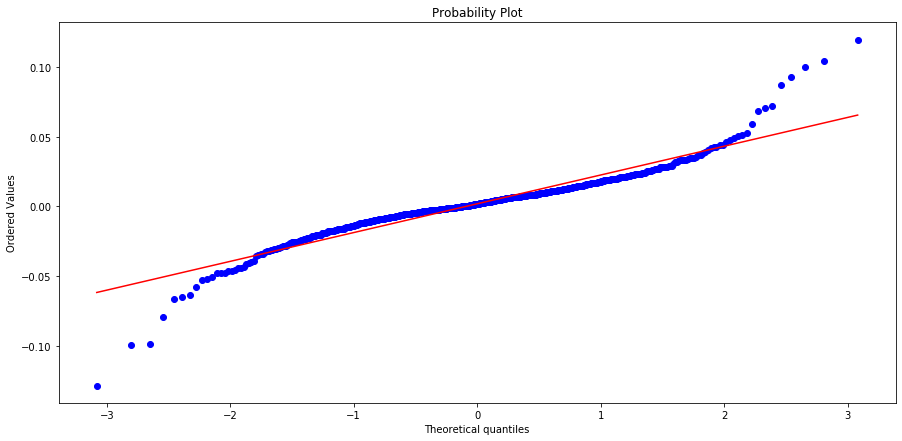

In [11]:
import scipy.stats as stats
fig3 = plt.figure(figsize=(15, 7))
ax3 = fig3.add_subplot(1, 1, 1)
ax3.set_title("Probplot")
stats.probplot(aapl['Return'], dist='norm', plot=ax3)
plt.show()

In [12]:
# Shapiro Test
print(stats.shapiro(aapl['Return']))

(0.9085970520973206, 1.2345789549566993e-19)


In [13]:
returns = aapl['Return']
quantiles = [] # records midpoints that we calculate
quantiles_percent = [] # records the proportion of the date lie below the quantile
for i, val in enumerate(returns[:-1]):
    quantiles.append((val + returns[i+1])/2)
    quantiles_percent.append((i+1)/len(returns))
sorted_quantiles = sorted(quantiles)
# print(sorted_quantiles)
# print(quantiles_percent)

In [14]:
from scipy.stats import norm
qp_array = np.array(quantiles_percent).reshape(-1,1)
tq_array = np.array(sorted_quantiles).reshape(-1,1)
qq_df = pd.DataFrame(np.concatenate((qp_array, tq_array), axis=1),
                     columns=['percent_below', 'quantile'])
qq_df['theoretical_quantile'] = [norm.ppf(percentage) for percentage in qq_df['percent_below']]
qq_df.tail()

,percent_below,quantile,theoretical_quantile
665,0.992548,0.044070,2.434725
666,0.994039,0.046258,2.514430
667,0.995529,0.047408,2.614268
668,0.997019,0.058394,2.749905
669,0.998510,0.064943,2.969729


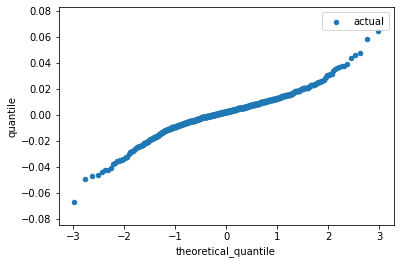

In [15]:
ax4 = qq_df.plot.scatter(x='theoretical_quantile', y='quantile', label='actual')

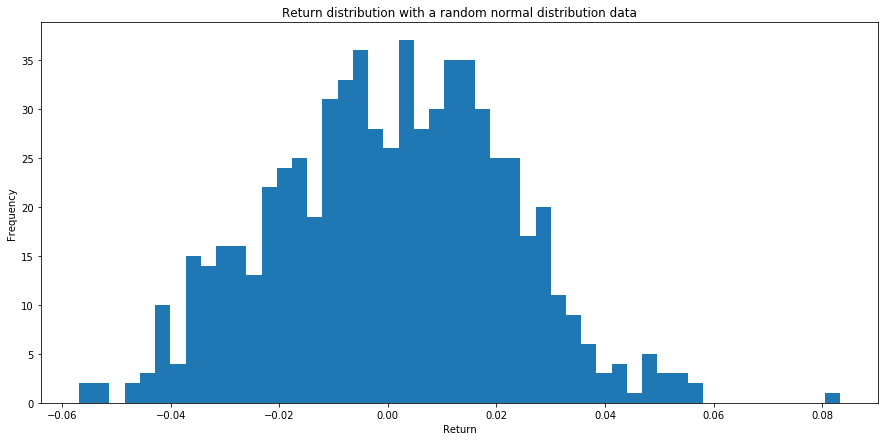

In [16]:
# a random normal distribution with the same mean and standard deviation for Apple Inc.
normal = np.random.normal(
    loc   = 0.001871, # mean
    scale = 0.021677, # std
    size  = 671, # num
)
fig = plt.figure(figsize=(15, 7))
ax5 = fig.add_subplot(1, 1, 1)
ax5.set_xlabel('Return')
ax5.set_ylabel('Frequency')
ax5.set_title('Return distribution with a random normal distribution data')
plt.hist(normal, bins=50)
plt.show()